In [1]:
import numpy as np
import scipy as sp
from scipy import io,integrate,sparse
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle,Circle

from lanczos_bin import *
#from lanczos_bin import mystep,distribution

from IPython.display import clear_output
np.set_printoptions(linewidth=300)
%load_ext autoreload
%autoreload 2

In [ ]:
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\renewcommand{\vec}{\mathbf}'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [24]:
s = 1/2
M = int(2*s+1)

x,y = 3,2

N = x*y
n = M**N

J = 1
h = 1*J

Jz_T = h*np.ones(N)
J_T = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        if i//x==j//x and np.abs(i-j)==1: # horizontal neighbor
            J_T[i,j] = 1
        if i%x==j%x and np.abs(i-j)==x:# vertical neighbor
            J_T[i,j] = -.45

In [25]:
H_T = get_hamiltonian(J_T,J_T,Jz_T,s).tosparse().A

In [26]:
lam = np.linalg.eigvalsh(H_T)
E0 = np.min(lam)

In [40]:
xx = np.linspace(lam[0],lam[-1],300)
Ts = [5e-2,1e0,7e0,1e2]
βs = 1/np.array(Ts)

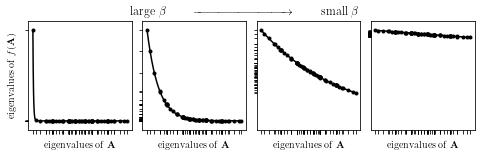

In [44]:
fig,axs = plt.subplots(1,len(βs),figsize=(8,2))
fig.subplots_adjust(wspace=0.1)


for i,β in enumerate(βs):
    
    f = lambda x: np.exp(-β*(x-E0))
    
#    axs[i].vlines(lam, 0, f(lam),lw=.5,color='k')
#    axs[i].hlines(f(lam), 0, lam,lw=.5,color='k')

    axs[i].plot(lam,f(lam),linestyle='None',marker='.',color='k')
    axs[i].plot(xx,f(xx),color='k')
    
    axs[i].set_xticks(lam)
    axs[i].set_xticklabels([])
    
    axs[i].set_yticks(f(lam))
    axs[i].set_yticklabels([])
    
    axs[i].set_ylim(-.1,1.1)
    
    axs[i].set_xlabel('eigenvalues of $\mathbf{A}$')
axs[0].set_ylabel('eigenvalues of $f(\mathbf{A})$')

plt.suptitle('large $\\beta$ \hspace{2em}$\\xrightarrow{\hspace{8em}}$\hspace{2em} small $\\beta$')
#    axs[i].yaxis.set_tick_params(width=1)

plt.savefig('imgs/exp_example.pdf',bbox_inches='tight')